<function matplotlib.pyplot.show(*args, **kw)>

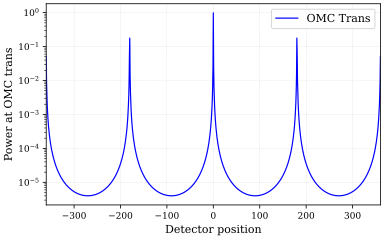

In [43]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)
base = finesse.kat()
base.verbose=False
base.parse("""

#========= constants ===============
# OMC distance 
const d1 0.357316M
const d2 0.359284M
const aoiomc 3.0
#========= source ===============

l i1 1 0 n0
s s1 1 n0 n1

# OMC1
bs omc1 0.996 0.004 0 -$aoiomc n1 nn2 n2 n9 
s omc12 0.357316 n2 n3

# OMC2
bs omc2 0.996 0.004 0 $aoiomc n3 n4 n33 nn3
s omc23 0.359284 n4 n5

# OMC2 to PD
s somc2pd 1 n33 npd

# OMC3
bs omc3 0.99996 0.00004 0 -$aoiomc n5 n6 n55 nn4
s omc34 0.357316 n6 n7

# OMC4
bs omc4 0.99996 0.00004 0 -$aoiomc n7 n8 nn1 n88
s omc41 0.359284 n8 n9



# OMC RC
attr omc3 Rc 1.8
attr omc4 Rc 1.8
attr omc1 Rc 0
attr omc2 Rc 0

#cavity
cav OMC_ring omc1 n2 omc1 n9


# amp detector
ad OMC_TR 0 npd
""")


kat0 = base.deepcopy()
kat0.parse("""
xaxis omc1 phi lin -360 360 1000
""")

out = kat0.run()
plt.figure(1)
plt.semilogy(out.x, out["OMC_TR"]**2,label="OMC Trans")
plt.xlabel("Detector position")
plt.ylabel("Power at OMC trans")
plt.legend(loc=1)
plt.show
